In [1]:

%load_ext autoreload

In [2]:
import pandas as pd
from IPython.display import display

from graphing import *
import numpy as np
from matplotlib import pyplot as plt

import re

%autoreload


In [17]:
ceva_in = pd.read_csv("logs\CEVA_inbound.csv")

In [5]:
inbound = ceva_in[ceva_in["label"] == "Request"]

In [35]:
t = UnitTest("Request", inbound, 60)

In [138]:
t.results['txn_per_hr'] = t.results['txn_per_sec']*3600

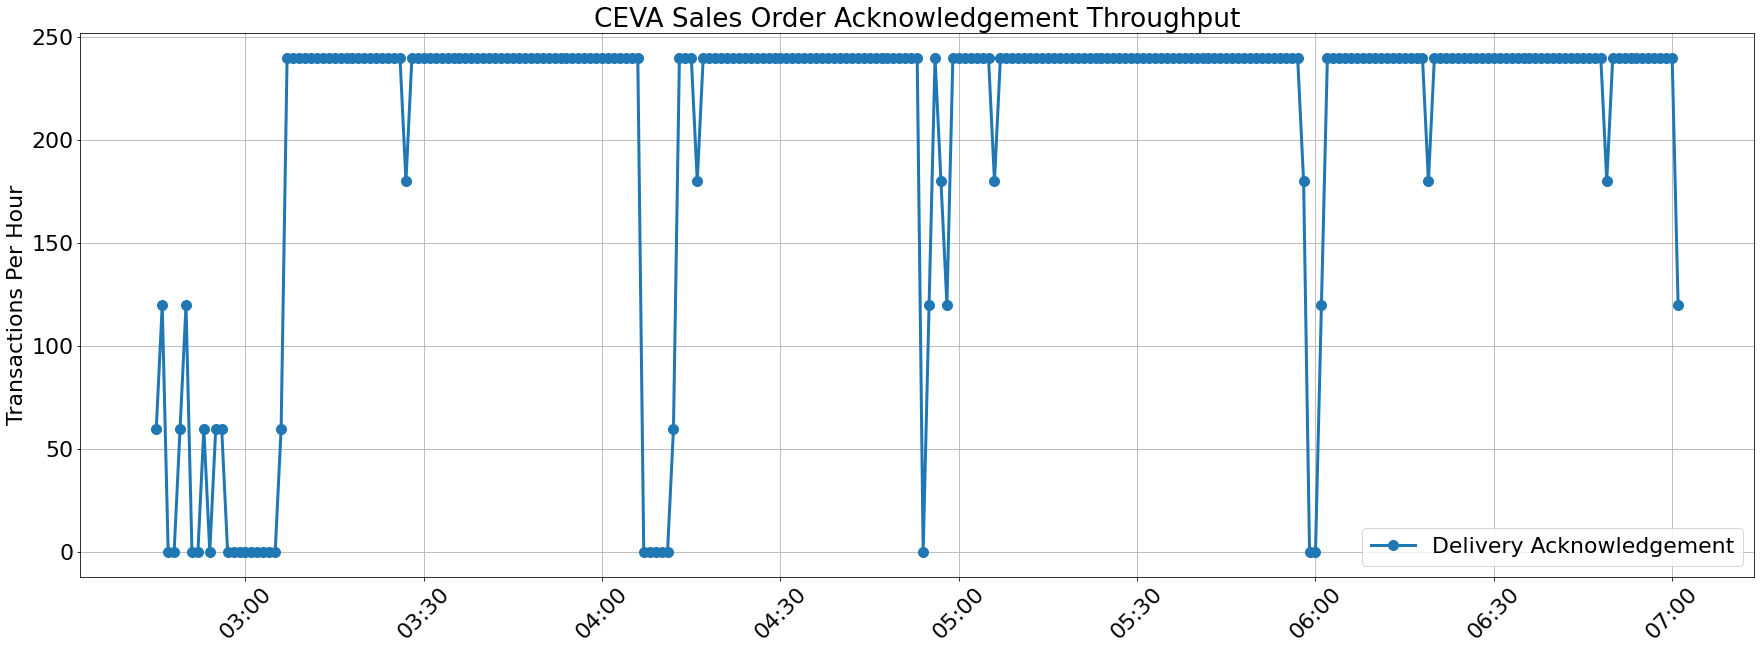

In [139]:
plt.rcParams["figure.figsize"] = [30, 10]
plt.rcParams.update({"font.size": 22})
fig, ax = plt.subplots()
#t.results.reset_index()


ax.plot(
    t.results.index,
    t.results['txn_per_hr'],
    label='Delivery Acknowledgement',
    linewidth=3,
    marker='o',
    markersize=10
)

ax.set_ylabel("Transactions Per Hour")

# Set the title
ax.set_title('CEVA Sales Order Acknowledgement Throughput')
ax.xaxis.set_major_formatter(
    dates.DateFormatter("%H:%M")
)  # Format Timestamps on xaxis
# Add a legend below the graph
ax.legend()

# Rotate the x-axis tick labels for better visibility (optional)
plt.xticks(rotation=45)
plt.grid()
# Display the plot
plt.show()


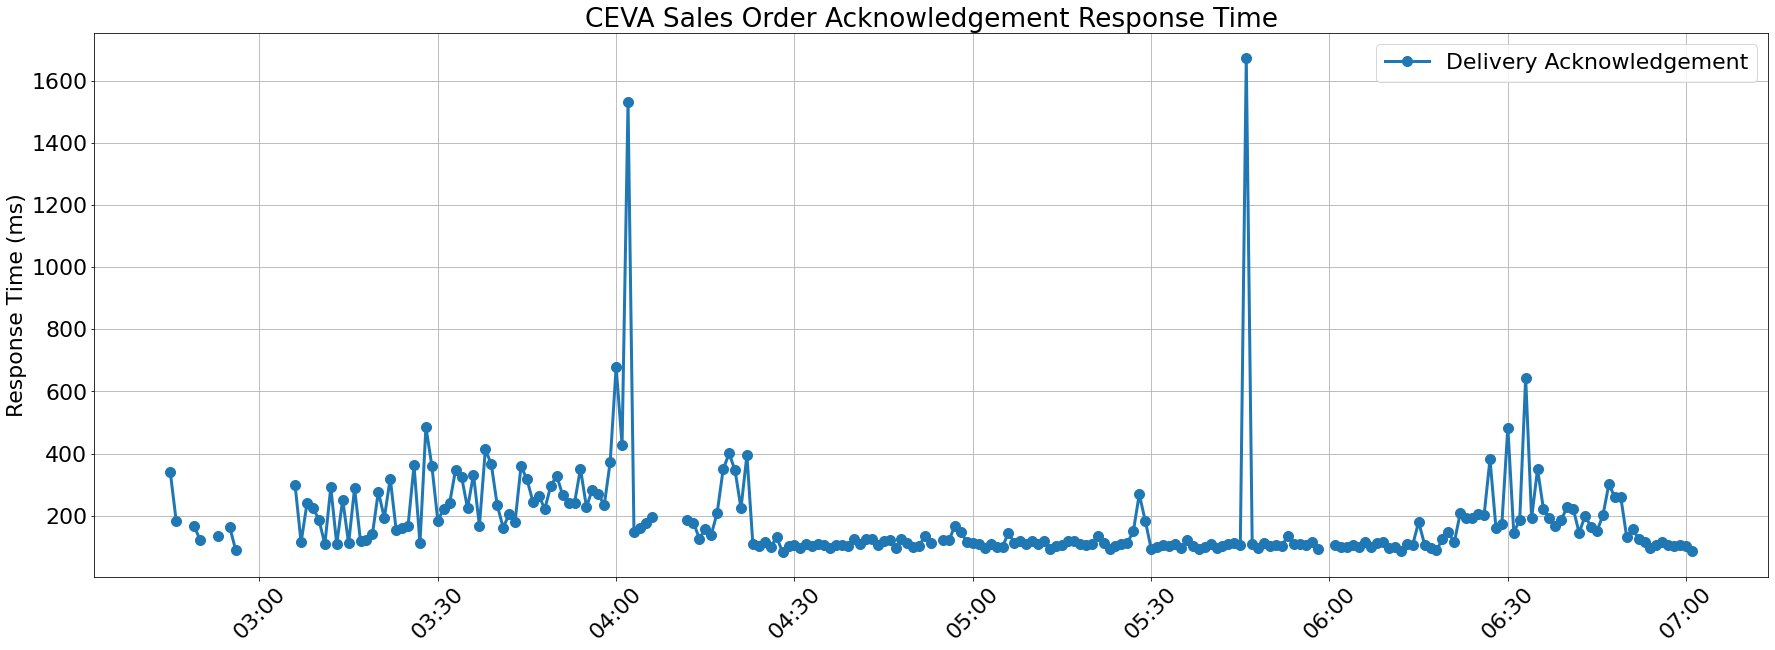

In [141]:
plt.rcParams["figure.figsize"] = [30, 10]
plt.rcParams.update({"font.size": 22})
fig, ax = plt.subplots()
#t.results.reset_index()


ax.plot(
    t.results.index,
    t.results['avg_res'],
    label='Delivery Acknowledgement',
    linewidth=3,
    marker='o',
    markersize=10
)

ax.set_ylabel("Response Time (ms)")

# Set the title
ax.set_title('CEVA Sales Order Acknowledgement Response Time')
ax.xaxis.set_major_formatter(
    dates.DateFormatter("%H:%M")
)  # Format Timestamps on xaxis
# Add a legend below the graph
ax.legend()

# Rotate the x-axis tick labels for better visibility (optional)
plt.xticks(rotation=45)
plt.grid()
# Display the plot
plt.show()

In [50]:
tnt = pd.read_csv('logs\day2_tnt.csv')
tnt['Time']= pd.to_datetime(tnt['End'])
tnt.set_index("Time", inplace=True)

In [52]:
tnt['INTERFACE_CODE'].unique()

order_event = tnt[tnt['INTERFACE_CODE']=='TPG-R2-L017-OrderEvent']
notif = tnt[tnt['INTERFACE_CODE']=='TPG-R2-L017.04']
order_event.head()

,INTERFACE_CODE,INTERFACE_RUN_ID,Start,End,Elapsed
Time,,,,,
2023-07-21 17:46:35,TPG-R2-L017-OrderEvent,3882687,17:46:16,21/JUL/23 05:46:35.000000000 PM,19
2023-07-21 17:46:35,TPG-R2-L017-OrderEvent,3882683,17:46:16,21/JUL/23 05:46:35.000000000 PM,19
2023-07-21 17:46:35,TPG-R2-L017-OrderEvent,3684922,17:46:16,21/JUL/23 05:46:35.000000000 PM,19
2023-07-21 17:46:35,TPG-R2-L017-OrderEvent,3684919,17:46:16,21/JUL/23 05:46:35.000000000 PM,19
2023-07-21 17:46:35,TPG-R2-L017-OrderEvent,3684920,17:46:16,21/JUL/23 05:46:35.000000000 PM,19


In [66]:
order_event = tnt[tnt['INTERFACE_CODE']=='TPG-R2-L017-OrderEvent'].resample('5min').agg({'INTERFACE_CODE':'count', 'Elapsed':'mean'})
notif = tnt[tnt['INTERFACE_CODE']=='TPG-R2-L017.04'].resample('5min').agg({'INTERFACE_CODE':'count', 'Elapsed':'mean'})

In [142]:
order_event_data = order_event[order_event['INTERFACE_CODE']>0]
notif_data = notif[notif['INTERFACE_CODE']>0]
sum(order_event_data['INTERFACE_CODE'])

956

In [77]:
order_event_data.reset_index(inplace=True)
order_event_data.head()

,Time,INTERFACE_CODE,Elapsed
0,2023-07-21 10:05:00,25,16.80
1,2023-07-21 10:15:00,25,12.80
2,2023-07-21 10:25:00,25,15.28
3,2023-07-21 10:35:00,25,19.52
4,2023-07-21 10:55:00,2,23.00


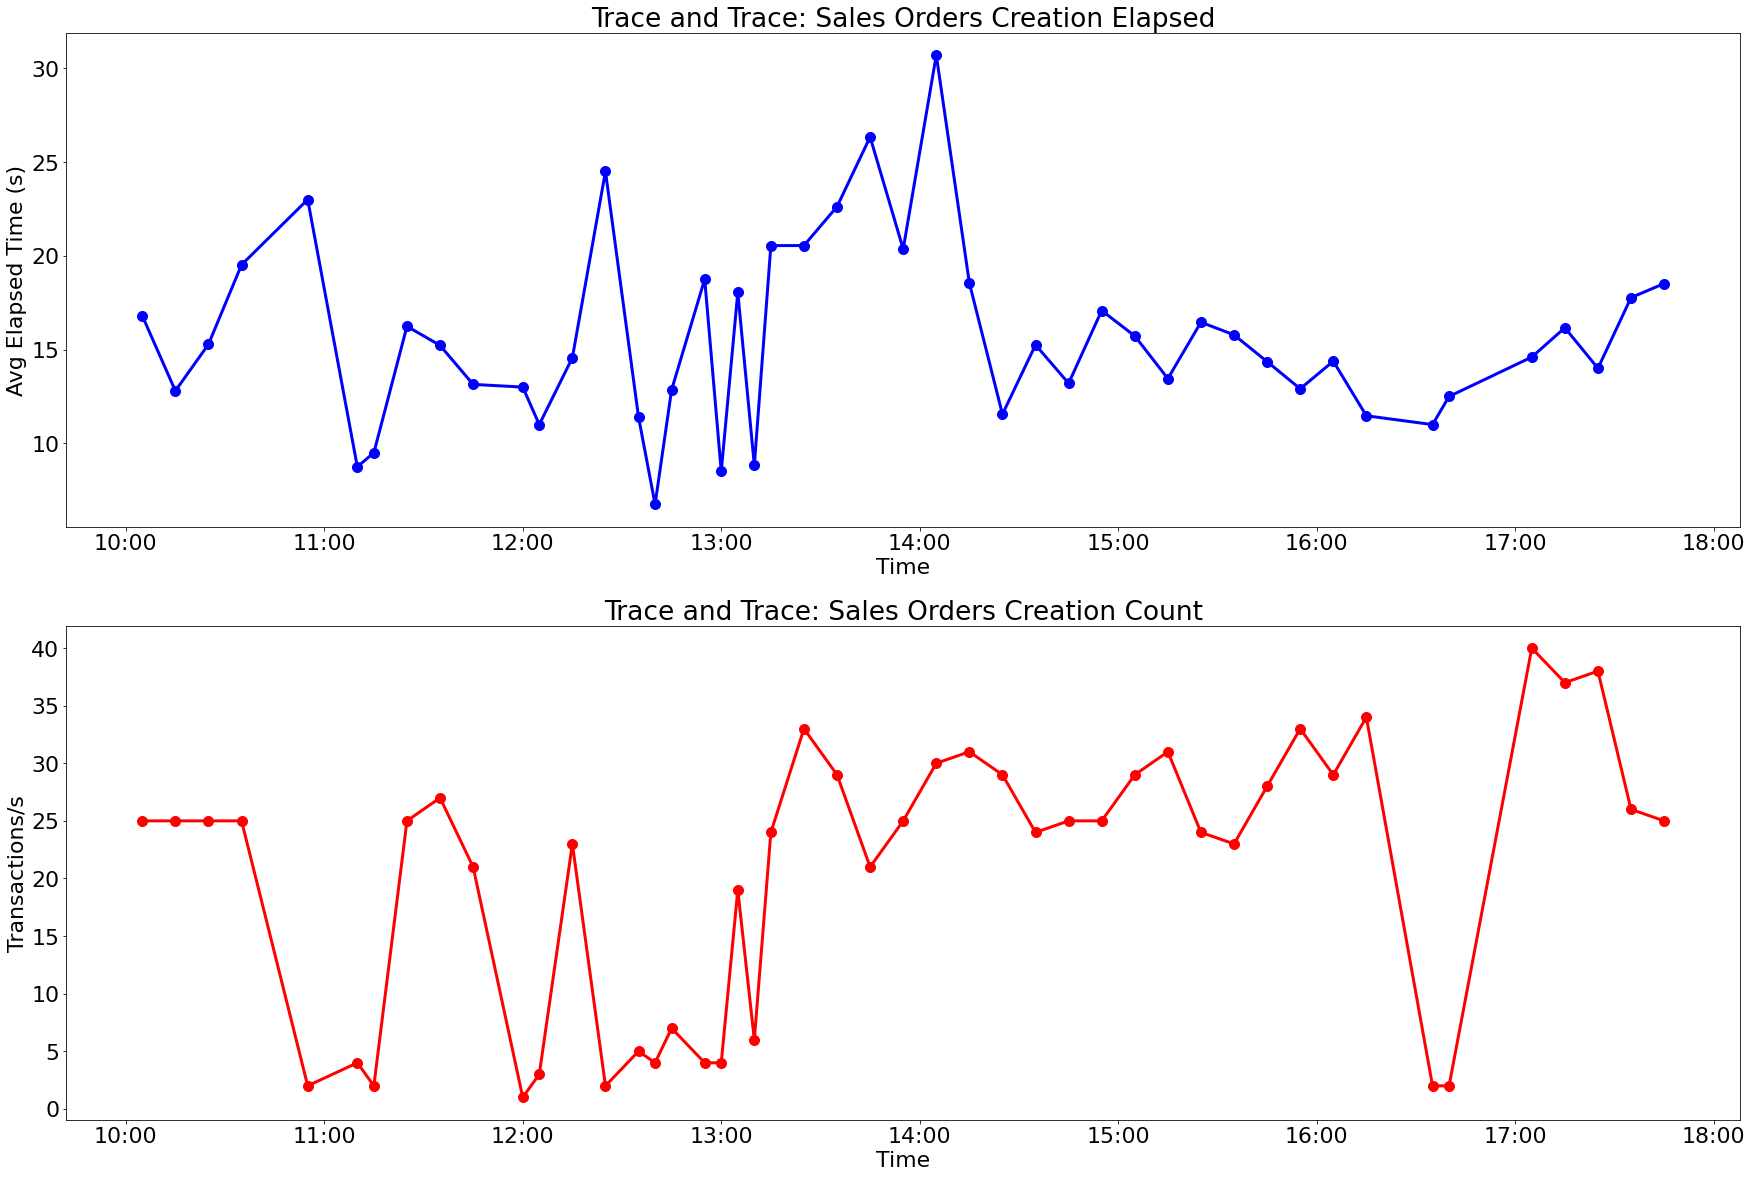

In [87]:
plt.rcParams["figure.figsize"] = [30, 20]
fig, ax = plt.subplots(2,1)
df = order_event_data.reset_index()
ax[0].plot(df['Time'], df["Elapsed"], 'b-', label='Elapsed Time', linewidth=3,
                marker='o',
                markersize=10)
ax[0].set_xlabel('Time')
ax[0].xaxis.set_major_formatter(
            dates.DateFormatter("%H:%M")
        )
ax[0].set_ylabel('Avg Elapsed Time (s)')
ax[0].tick_params('y')
ax[0].title.set_text('Trace and Trace: Sales Orders Creation Elapsed')


ax[1].plot(df['Time'], df["INTERFACE_CODE"], 'r-', label='# of Orders Created', linewidth=3,
                marker='o',
                markersize=10)
ax[1].set_ylabel('Transactions/s')
ax[1].tick_params('y')
ax[1].set_xlabel('Time')
ax[1].title.set_text('Trace and Trace: Sales Orders Creation Count')
ax[1].xaxis.set_major_formatter(
            dates.DateFormatter("%H:%M")
        )

plt.show()

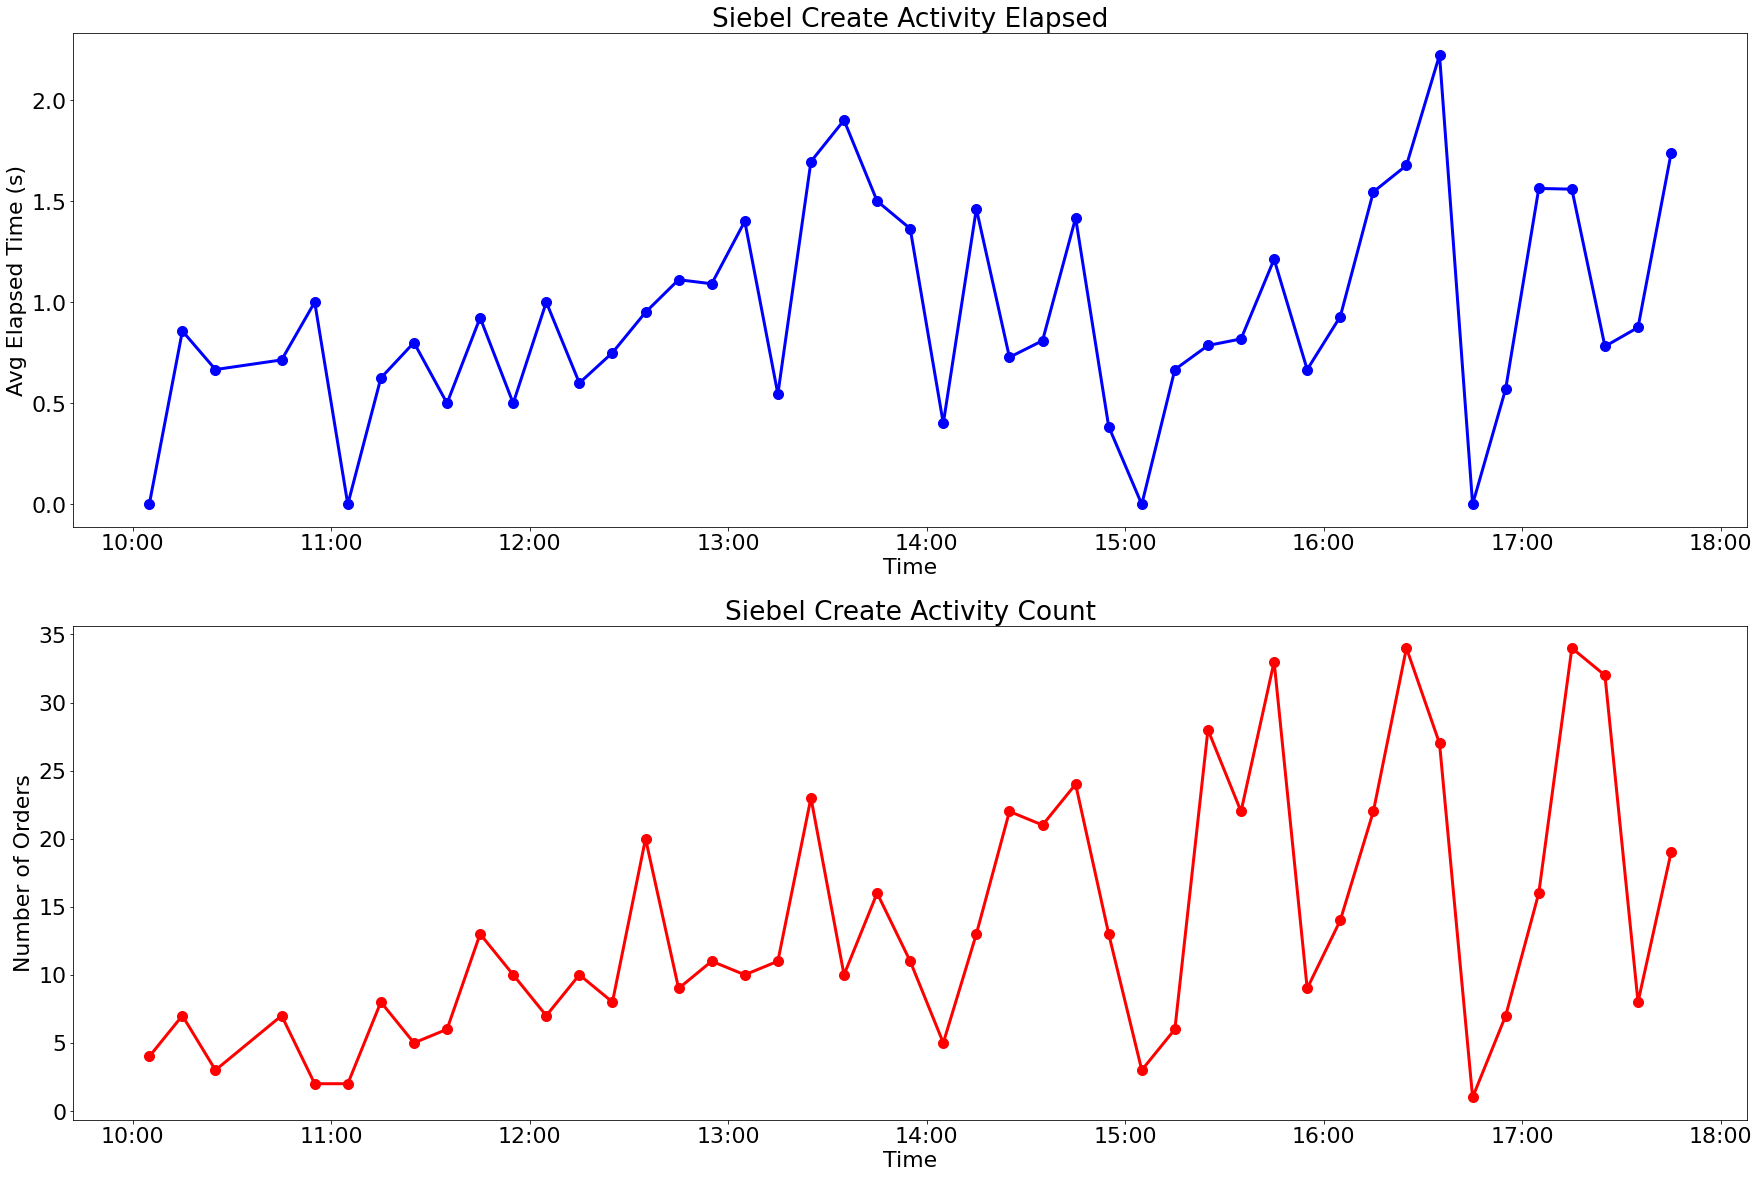

In [93]:
plt.rcParams["figure.figsize"] = [30, 20]
fig, ax = plt.subplots(2,1)
df = notif_data.reset_index()
ax[0].plot(df['Time'], df["Elapsed"], 'b-', label='Elapsed Time', linewidth=3,
                marker='o',
                markersize=10)
ax[0].set_xlabel('Time')
ax[0].xaxis.set_major_formatter(
            dates.DateFormatter("%H:%M")
        )
ax[0].set_ylabel('Avg Elapsed Time (s)')
ax[0].tick_params('y')
ax[0].title.set_text('Siebel Create Activity Elapsed')


ax[1].plot(df['Time'], df["INTERFACE_CODE"], 'r-', label='# of Orders Created', linewidth=3,
                marker='o',
                markersize=10)
ax[1].set_ylabel('Number of Orders')
ax[1].tick_params('y')
ax[1].set_xlabel('Time')
ax[1].title.set_text('Siebel Create Activity Count')
ax[1].xaxis.set_major_formatter(
            dates.DateFormatter("%H:%M")
        )

plt.show()


In [3]:
day2 = pd.read_csv('logs\day2_full.csv', low_memory=False)
day2_test = Test(day2, 300)


0         -1.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
424602    11.0
424603    11.0
424604    11.0
424605    11.0
424606    11.0
Name: segment, Length: 424607, dtype: float64

In [116]:
day2_test.export_summary_metrics_by_segment('day2_seg_stats.csv')

Segment: 0
Segment: 1
Segment: 2
Segment: 3
Segment: 4
Segment: 5
Segment: 6
Segment: 7
Segment: 8
Segment: 9
Segment: 10
Segment: 11


In [6]:
l  = [label for label in day2_test.unique_labels if not label.startswith("Token")]

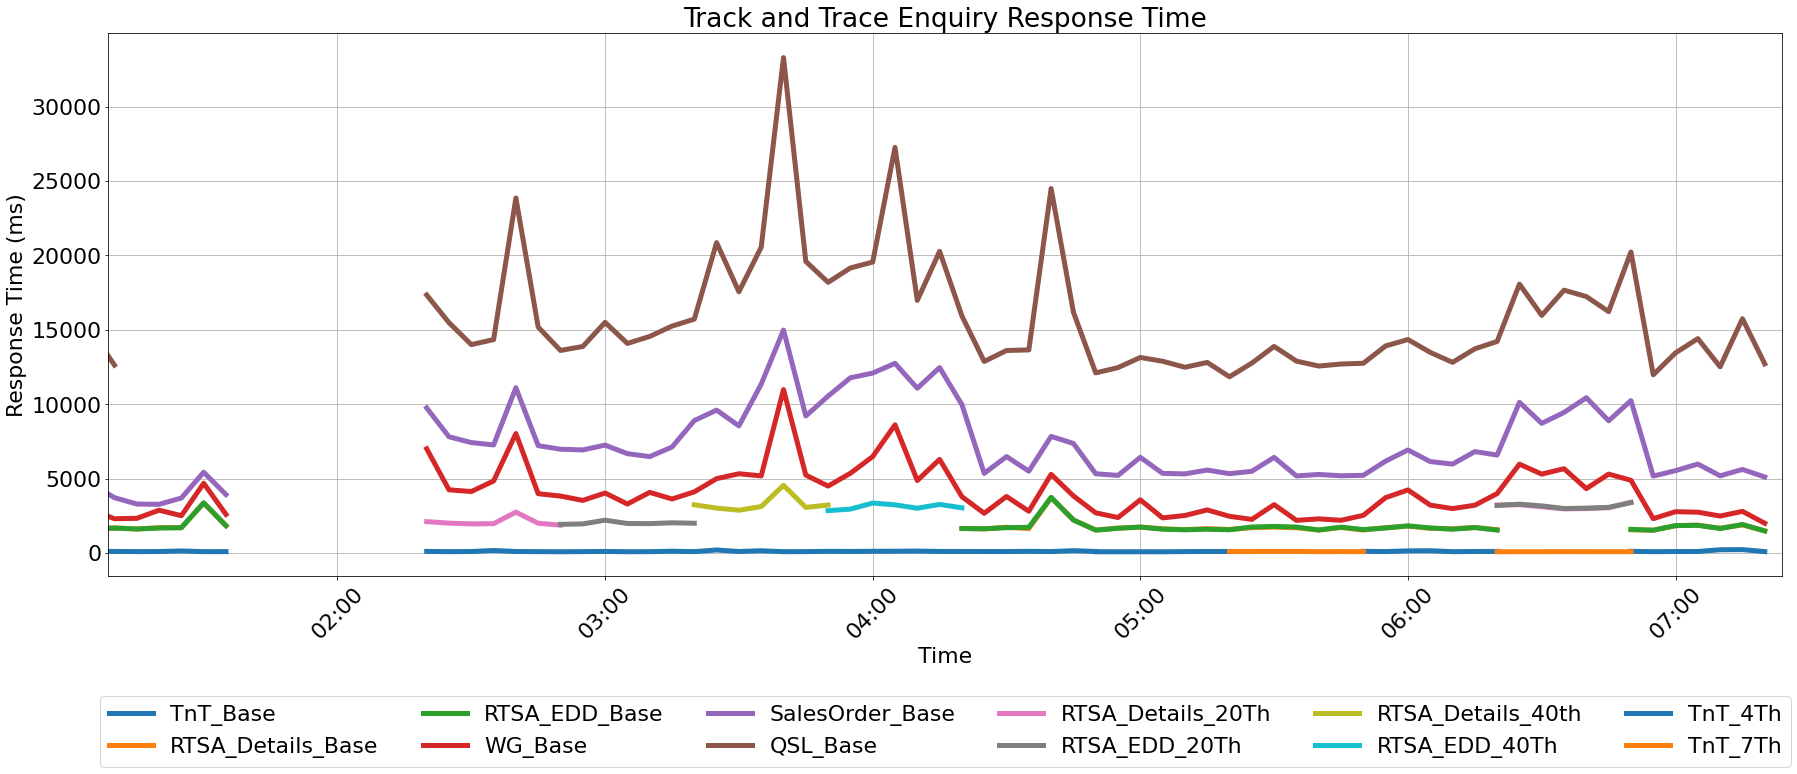

In [7]:
day2_test.time_series_by_labels(l,[], 'Track and Trace Enquiry Response Time', 'avg_res')

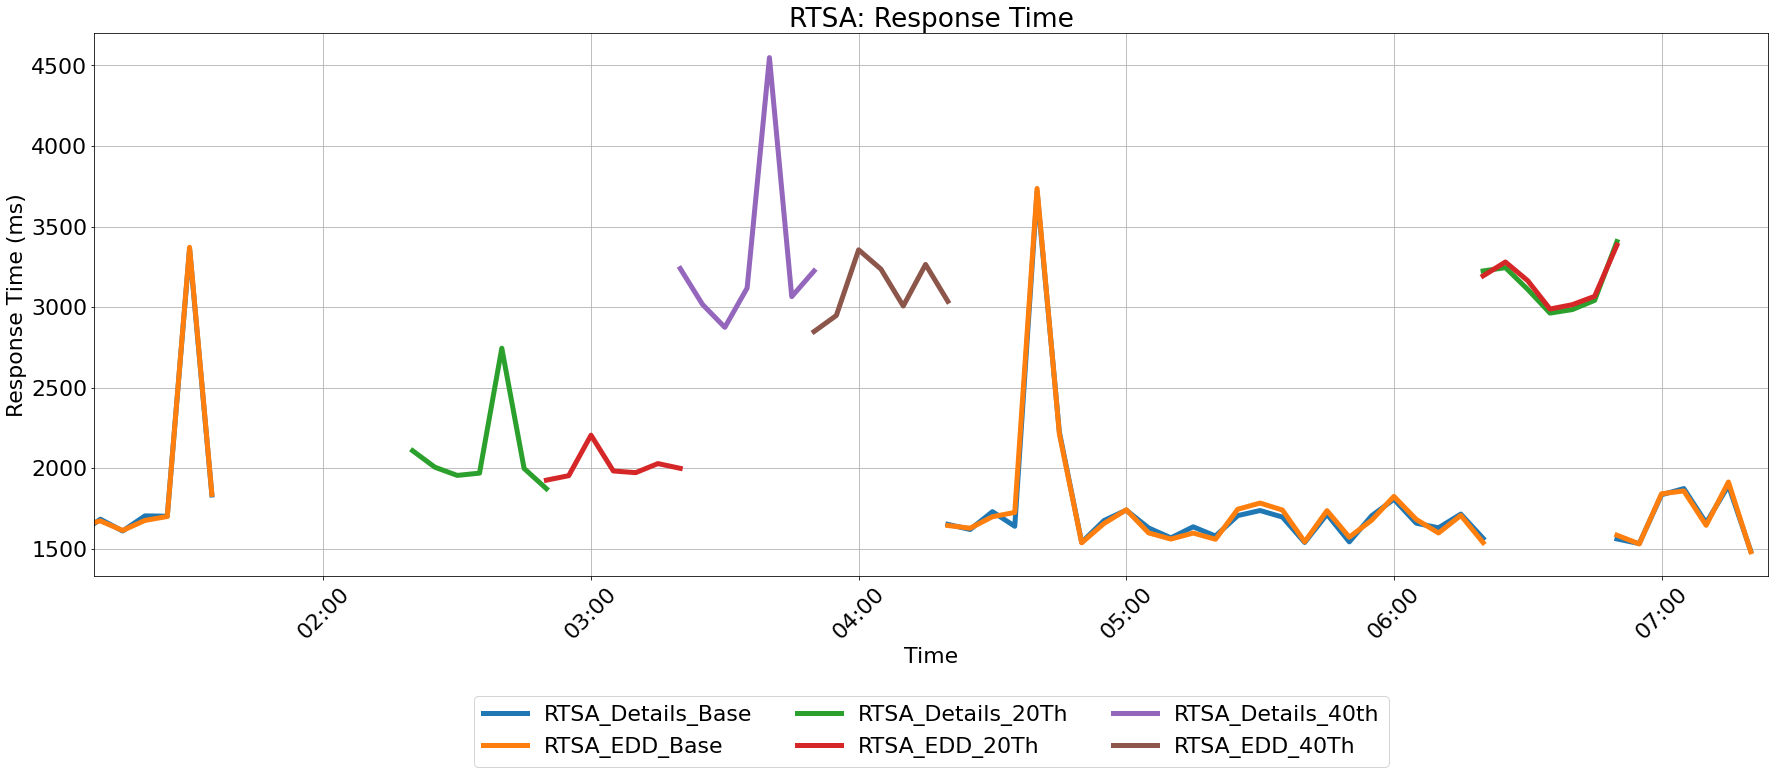

In [8]:
day2_test.time_series_by_categories(['RTSA'],[], 'RTSA: Response Time', 'avg_res')

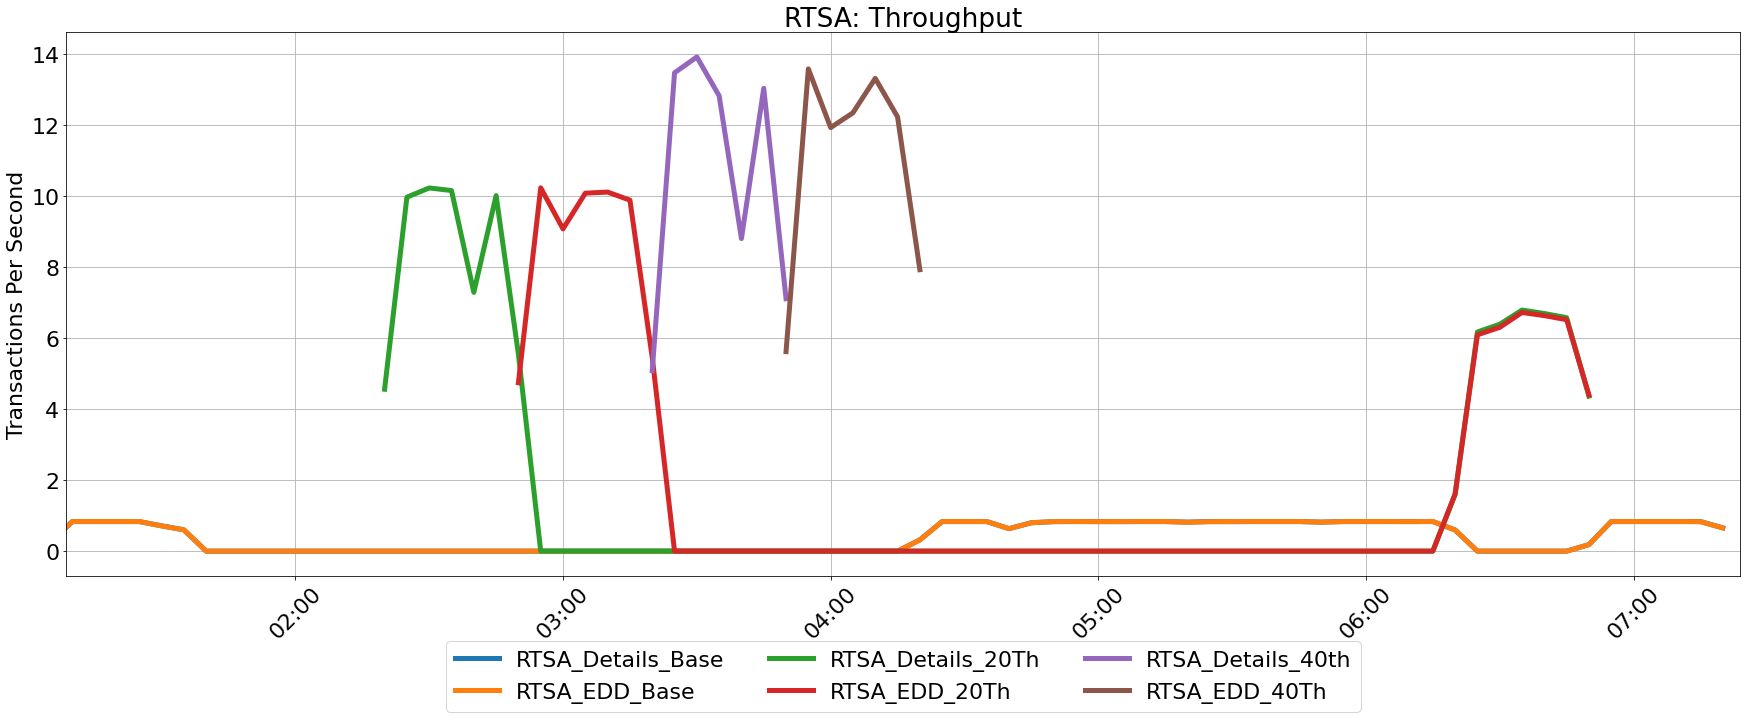

In [132]:
day2_test.time_series_by_categories(['RTSA'],[], 'RTSA: Throughput', 'txn_per_sec')

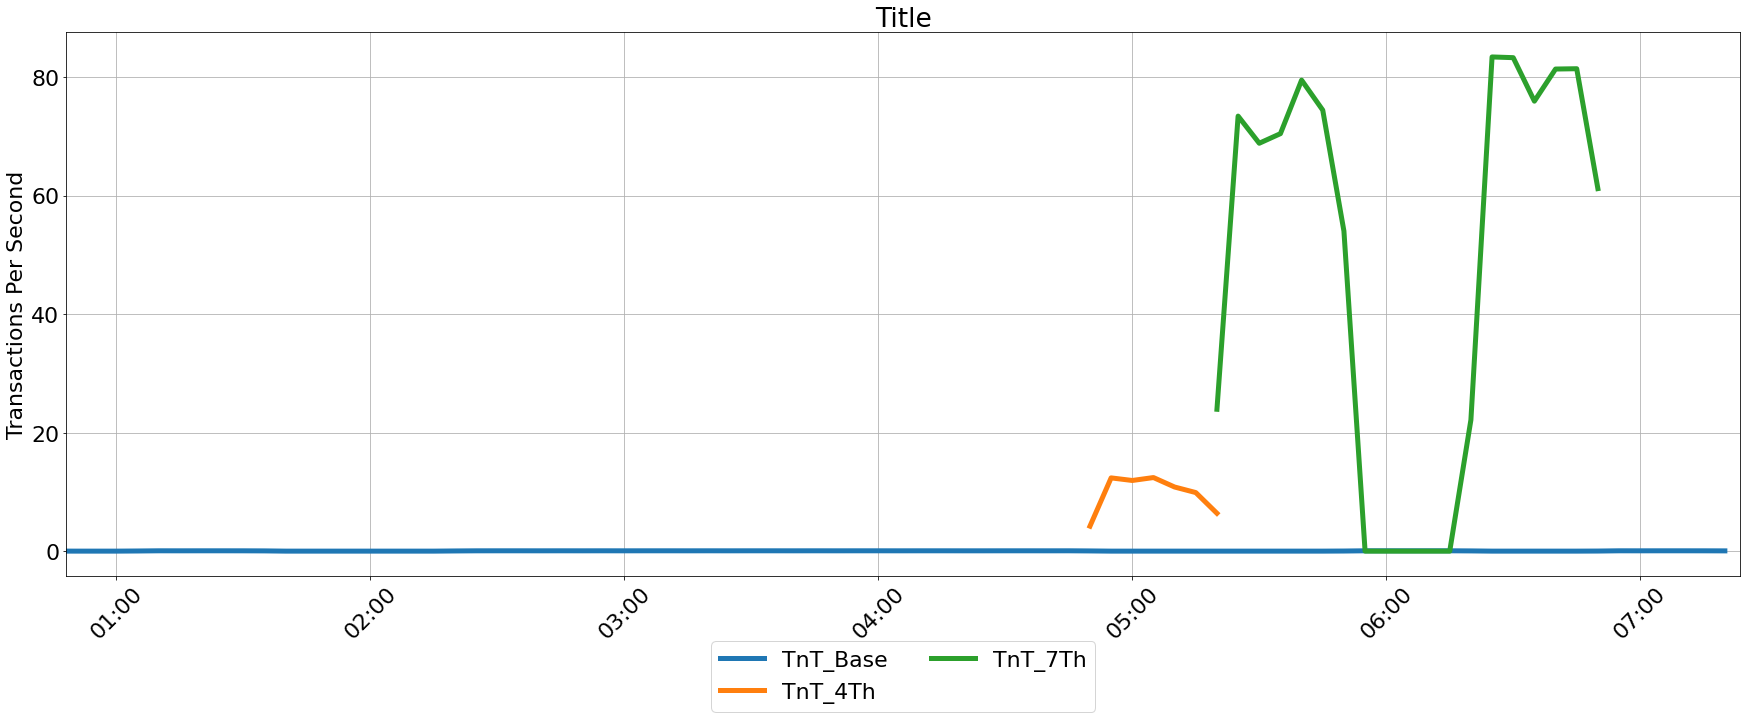

In [124]:
day2_test.time_series_by_categories(['TnT'],[], 'Track and Trace ', 'txn_per_sec')

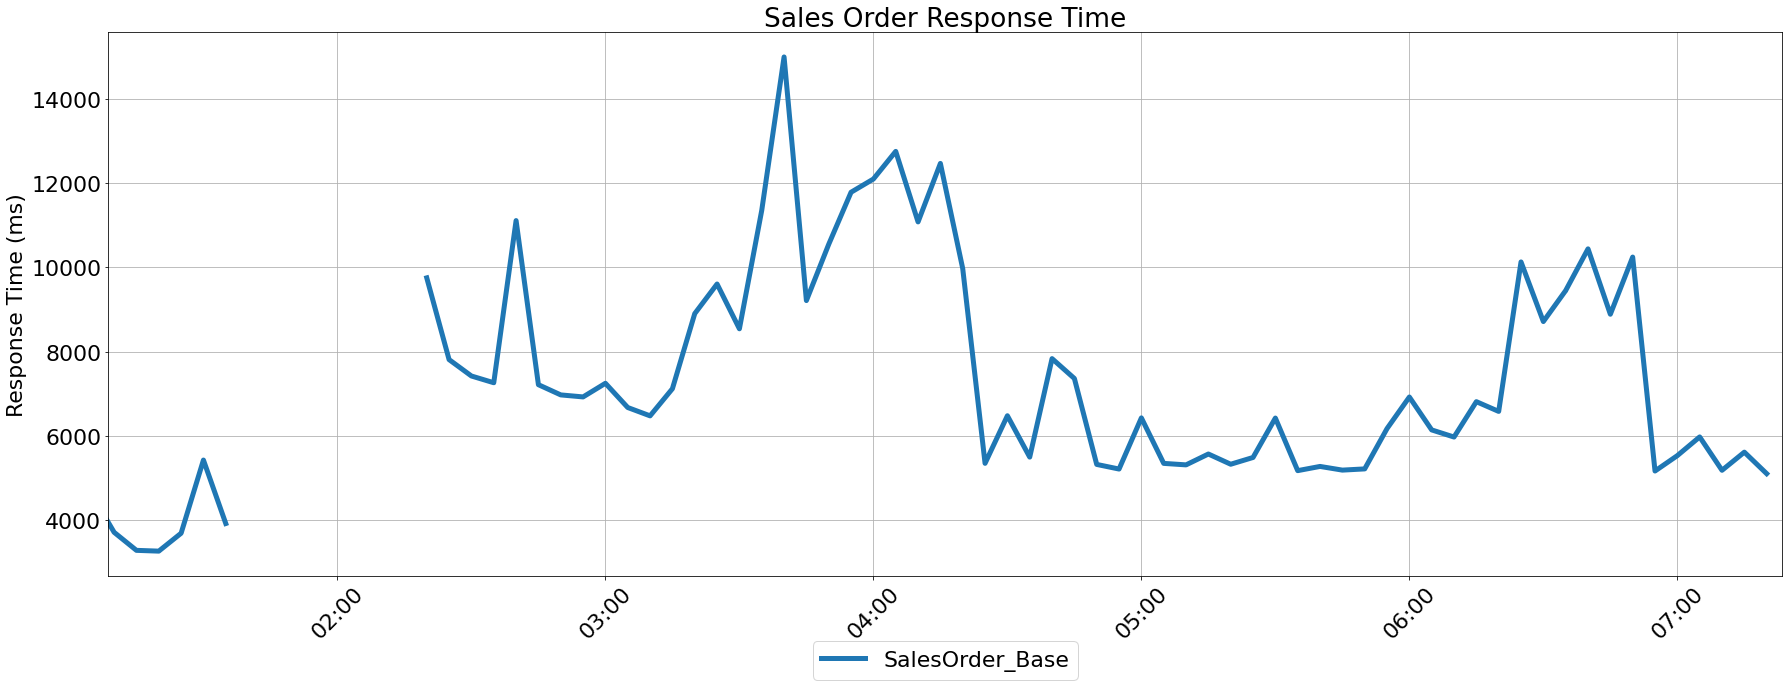

In [134]:
day2_test.time_series_by_categories(['SalesOrder'],[], 'Sales Order Response Time', 'avg_res') 

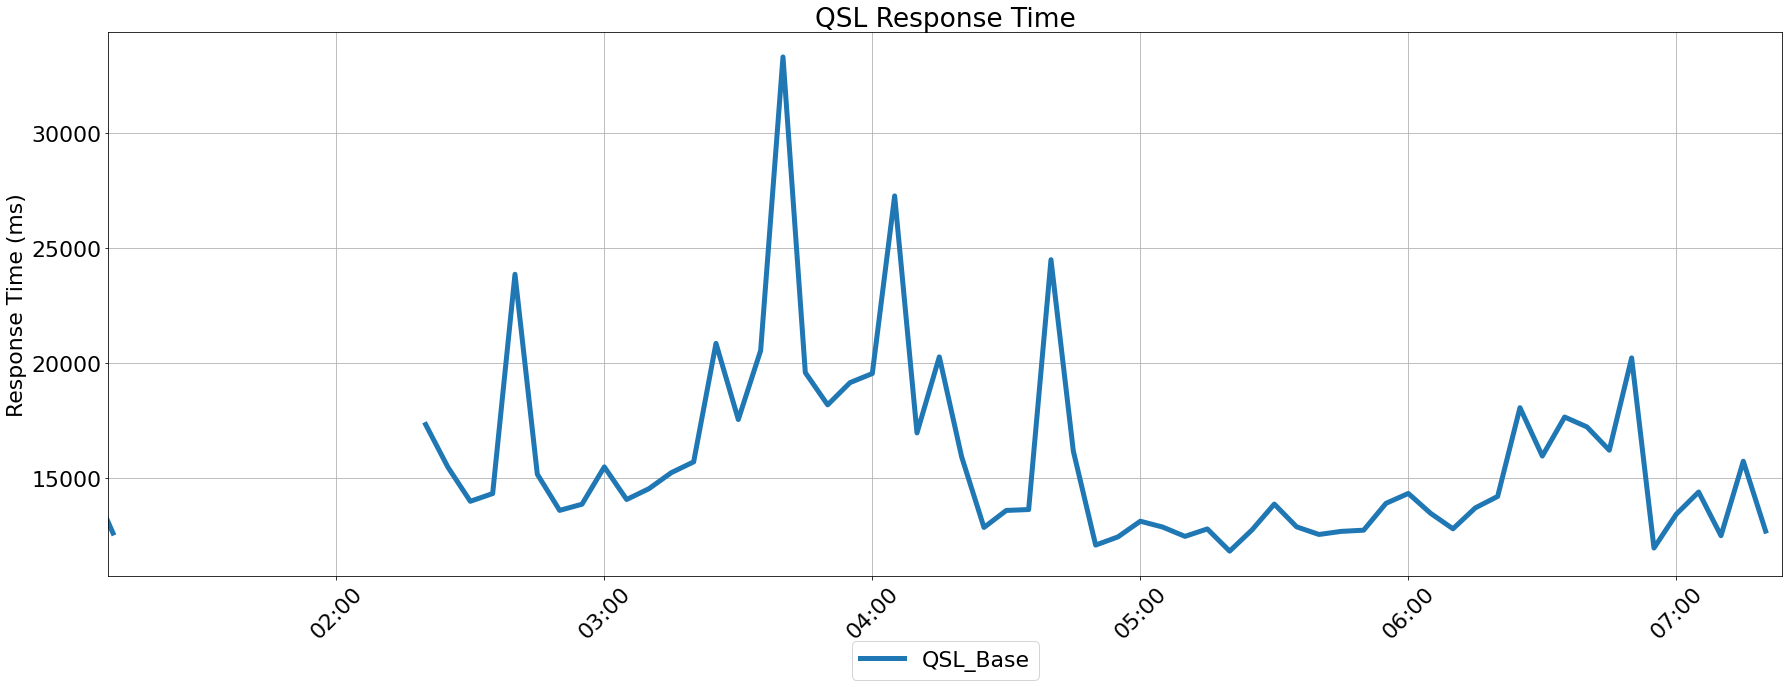

In [135]:
day2_test.time_series_by_categories(['QSL'],[], 'QSL Response Time', 'avg_res') 

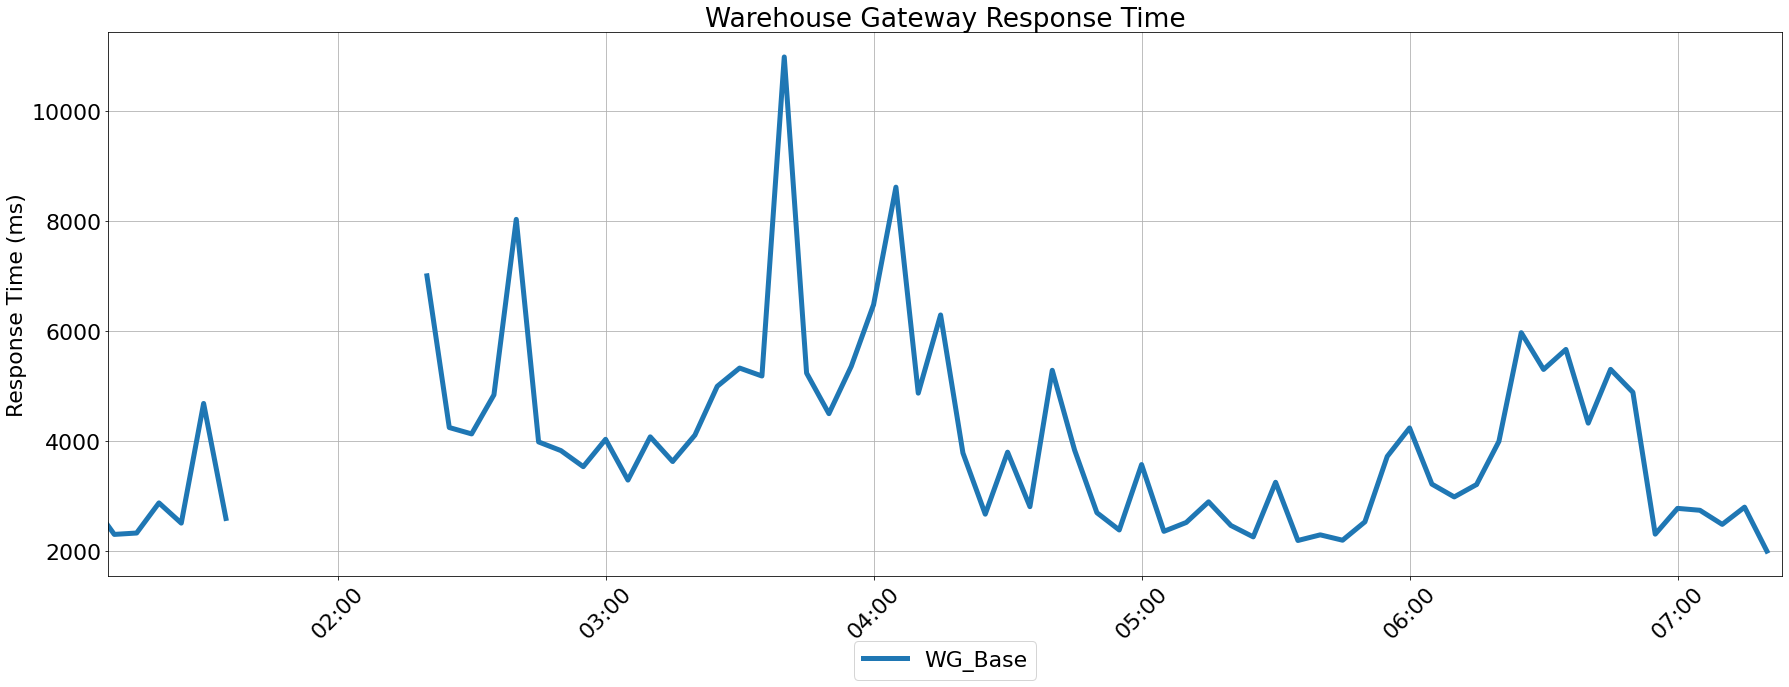

In [137]:
day2_test.time_series_by_categories(['WG'],[], 'Warehouse Gateway Response Time', 'avg_res') 

<function matplotlib.pyplot.show(close=None, block=None)>

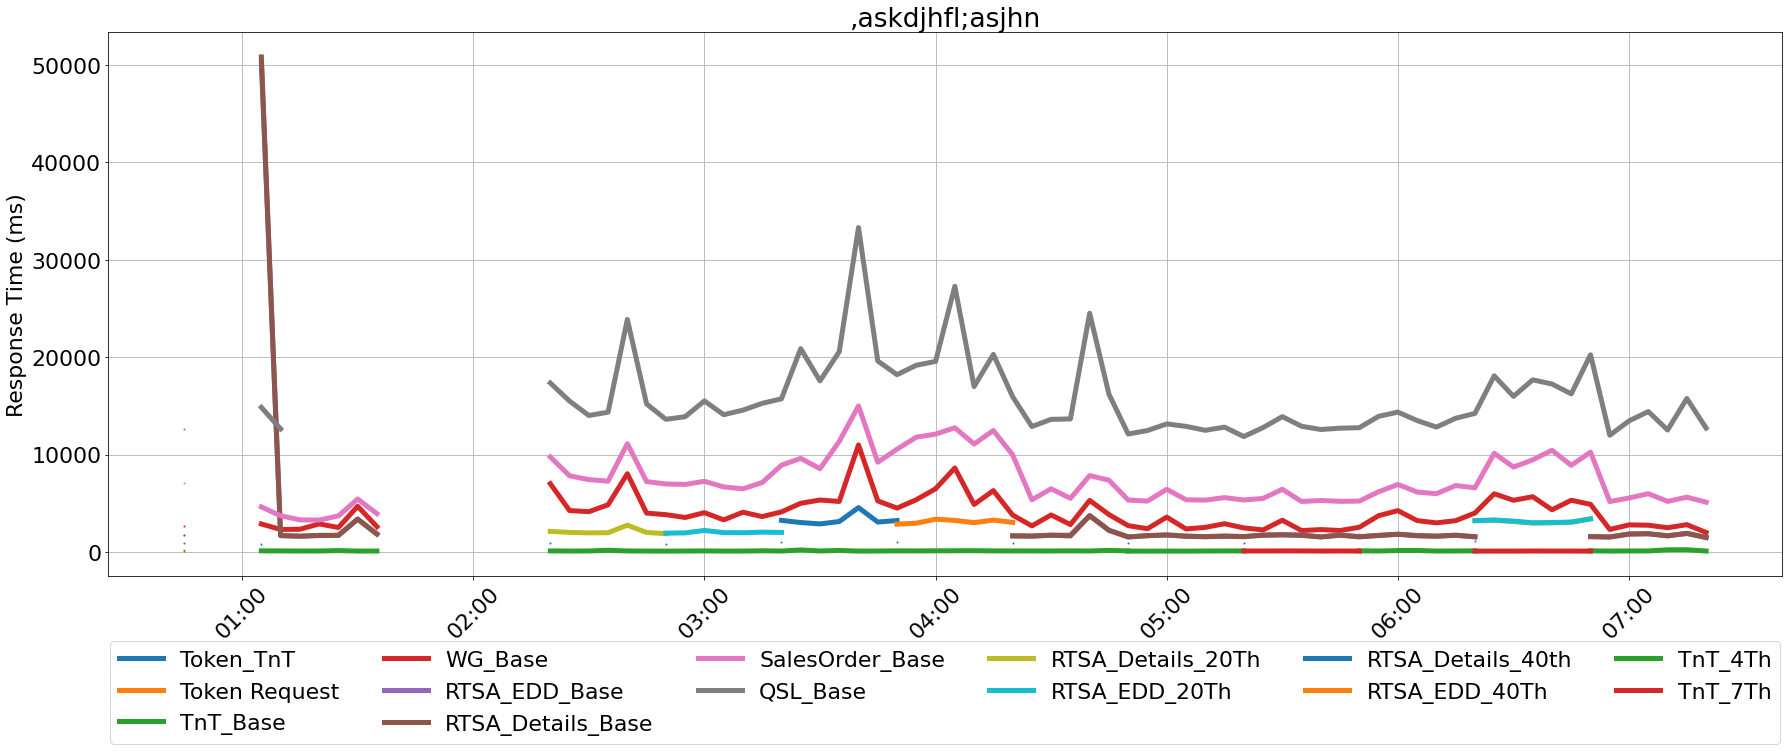

In [102]:

plt.rcParams["figure.figsize"] = [30, 10]
plt.rcParams.update({"font.size": 22})
fig, ax = plt.subplots()



nlabels = len(l)
for u in day2_test.unit_tests.values():
    dataframe = u.results.reset_index()
# Plot the line for the label
    ax.plot(
    dataframe["timeStamp"],
    dataframe['avg_res'],
    label=u.label,
    linewidth=5,
    marker=u.line_app.marker,
    markersize=1
    )

ax.set_ylabel("Response Time (ms)")


# Set the title
ax.set_title(',askdjhfl;asjhn')
ax.xaxis.set_major_formatter(
dates.DateFormatter("%H:%M")
)  # Format Timestamps on xaxis
# Add a legend below the graph
ax.legend(
loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=(nlabels + 1) // 2
)

# Rotate the x-axis tick labels for better visibility (optional)
plt.xticks(rotation=45)
plt.grid()
# Display the plot
plt.show
